In [1]:
import numpy as np
import matplotlib.pyplot as plt

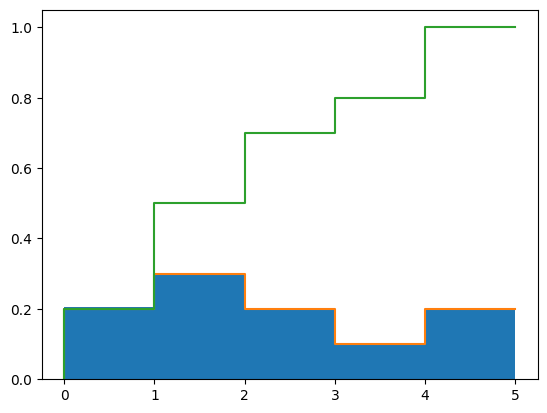

In [2]:
# ex1
def discrete_sampling(p, uni_samples):
    cdf = np.cumsum(p)
    for i in range(len(p)):
        if i==0 and uni_samples<=cdf[i]:
            dis_samples = i
        elif cdf[i-1] < uni_samples <= cdf[i]:
            dis_samples = i
    return dis_samples
    
p = np.array([0.2, 0.3, 0.2, 0.1, 0.2])
cdf = np.cumsum(p)
dis_samples = [discrete_sampling(p, np.random.uniform()) for i in range(5000)]
plt.hist(dis_samples, bins=[0, 1, 2, 3, 4, 5], density=True)
plt.step([0, 1, 2, 3, 4, 5], np.append([0], list(p)))
plt.step([0, 1, 2, 3, 4, 5], np.append([0], list(cdf)))

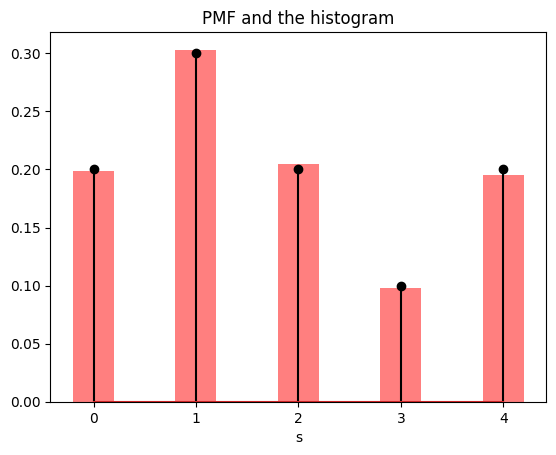

In [3]:
# ex1 sol
n = 10000

p = np.array([0.2, 0.3, 0.2, 0.1, 0.2]) # probability mass function
s = np.array([0, 1, 2, 3, 4]) # support

cdf = np.cumsum(p) # compute CDF

samples = []

for i in range(n):
    u = np.random.uniform(0, 1)

    # find the first element of cdf that is greater than u
    # this is the index of the state that we will sample
    for k in range(len(cdf)):
        if cdf[k] > u:
            samples.append(s[k])
            # the first time if holds , we break out of the for loop
            break


# plot the pmf and histogram using the stem function
plt.stem(s, p, markerfmt='o', linefmt='k-')
plt.hist(samples , range(6), density=True , rwidth=0.4, color='r', alpha=0.5, align='left')
# Above function aligns the histogram with the PMF.
plt.title("PMF and the histogram")
plt.xlabel("s")
plt.show ()

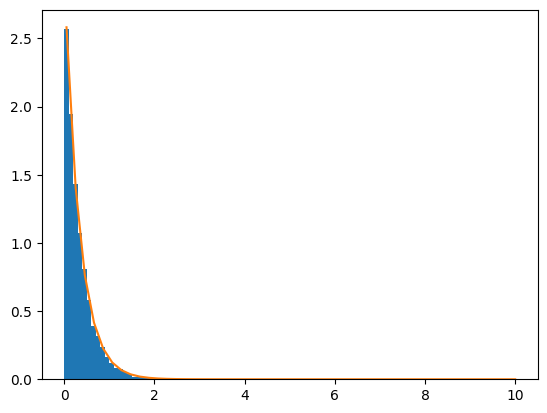

In [4]:
# ex2
mean = 3
exp_samples = - np.log(1-np.random.uniform(size=5000)) / mean
plt.hist(exp_samples, bins=100, range=(0, 10), density=True)
plt.plot(np.linspace(0.05, 10, 50), mean*np.exp(np.linspace(0.05, 10, 50)*(-mean)))

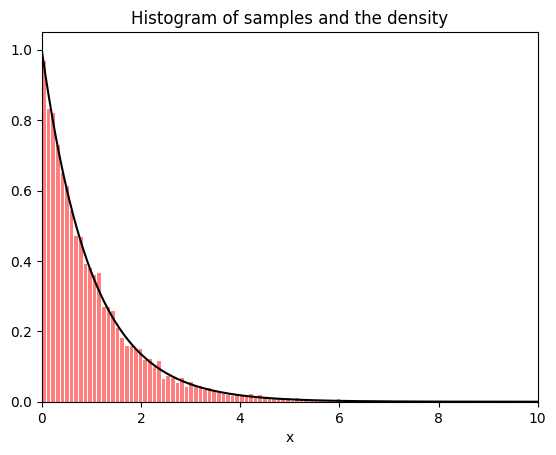

In [5]:
# ex2 sol
# sample from exponential distribution with inversion
n = 10000 # number of samples

# parameters of the exponential distribution
lam = 1

samples = np.array([]) # list to store samples

for i in range(n):
    u = np.random.uniform(0, 1) # sample from uniform distribution
    x = -(1/lam) * np.log(1 - u) # inverse of the CDF
    samples = np.append(samples , x) # add the sample to the list

# plot the histogram of the samples and the density
x = np.linspace(0, 10 , 1000)
y = lam * np.exp(-lam * x)
plt.hist(samples , bins=100 , density=True , rwidth=0.8, color='r', alpha=0.5)
plt.plot(x, y, 'k-')
plt.title("Histogram of samples and the density")
plt.xlabel("x")
plt.xlim([0, 10])
plt.show ()

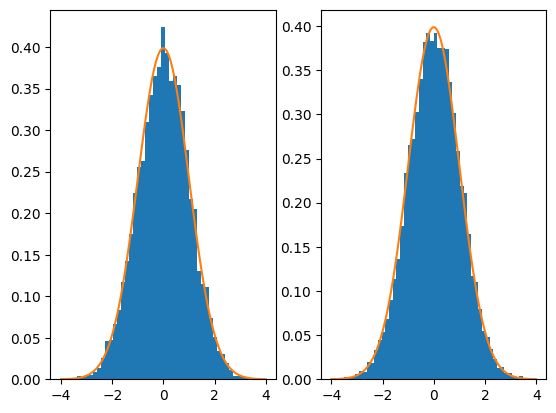

In [6]:
# ex3
A = 2*np.pi*np.random.uniform(size=10000)
R = (-2*np.log(np.random.uniform(size=10000)))**0.5
X = R*np.cos(A)
Y = R*np.sin(A)
x_range = np.linspace(-4, 4, 100)
y_range = np.exp(-0.5*x_range**2)/(np.sqrt(2*np.pi))
plt.subplot(1, 2, 1)
plt.hist(X, bins=50, density=True)
plt.plot(x_range, y_range)
plt.subplot(1, 2, 2)
plt.hist(Y, bins=50, density=True)
plt.plot(x_range, y_range)

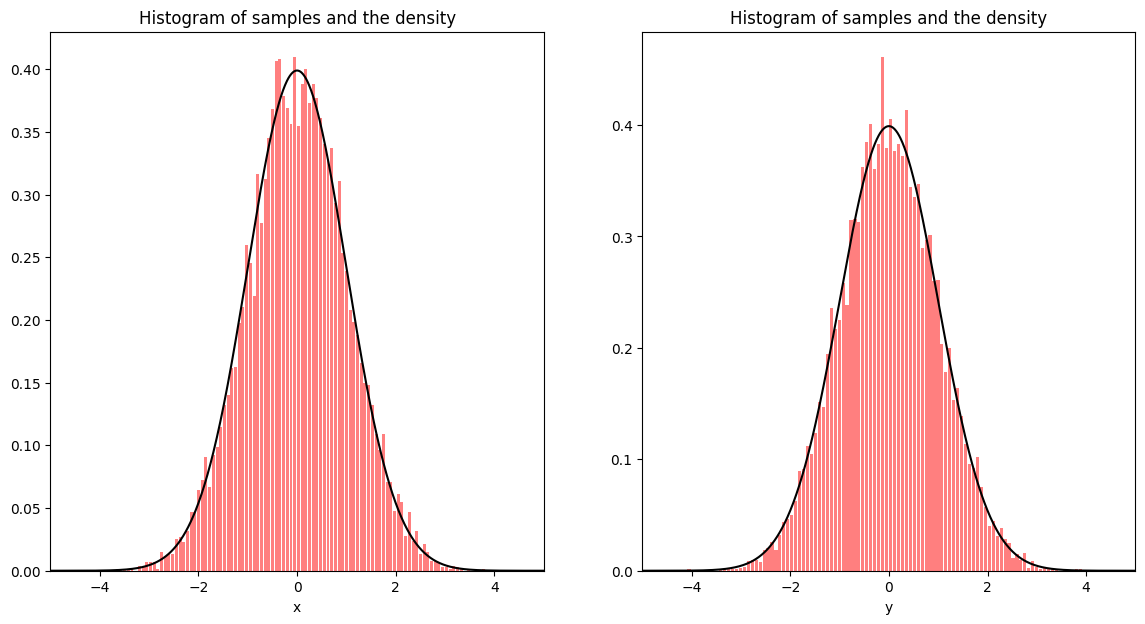

In [7]:
# ex3 sol
# sample from Gaussian using uniforms
n = 10000 # number of samples

x = np.array([]) # list to store samples
y = np.array([]) # list to store samples

for i in range(n):
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)
    A = 2 * np.pi * u1
    R = np.sqrt(-2 * np.log(u2))
    x = np.append(x, R * np.cos(A))
    y = np.append(y, R * np.sin(A))

# plot the histogram of the samples and the density
xx = np.linspace(-5, 5, 1000)
gauss_density = 1/np.sqrt(2 * np.pi) * np.exp(-xx**2 / 2)
fig , axs = plt.subplots(1, 2, figsize=(14 , 7))
axs[0].hist(x, bins=100 , density=True , rwidth=0.8, color='r', alpha=0.5)
axs[0].plot(xx , gauss_density , 'k-')
axs[0].set_title ("Histogram of samples and the density")
axs[0].set_xlabel ("x")
axs[0].set_xlim ([-5, 5])
axs[1].hist(y, bins=100 , density=True , rwidth=0.8, color='r', alpha=0.5)
axs[1].plot(xx , gauss_density , 'k-')
axs[1].set_title ("Histogram of samples and the density")
axs[1].set_xlabel ("y")
axs[1].set_xlim ([-5, 5])
plt.show ()

the mean of Z is 3.0054149150367957
the variance of Z is 4.025327194696227


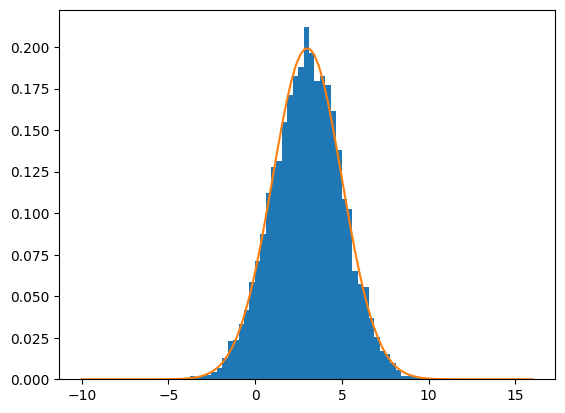

In [8]:
# ex4
mean = 3
std = 2
Z = mean + std*X
x_range = np.linspace(-10, 16, 100)
y_range = np.exp(-0.5*((x_range-mean)/std)**2)/(np.sqrt(2*np.pi)*std)
plt.hist(Z, bins=50, density=True)
plt.plot(x_range, y_range)
print('the mean of Z is', np.mean(Z))
print('the variance of Z is', np.std(Z)**2)

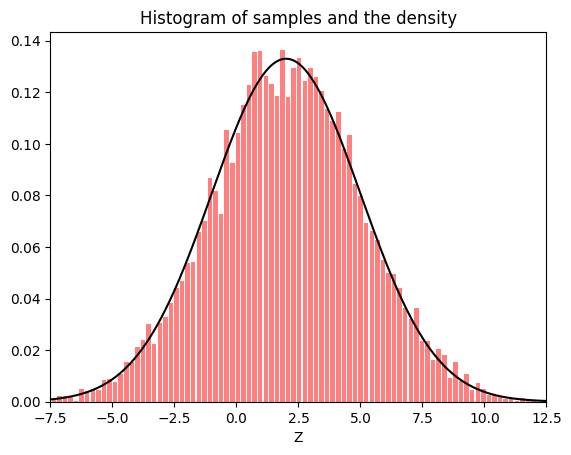

In [9]:
# ex4 sol
# Assuming x samples generated as in the previous exercise , cont. code
mu = 2
sigma = 3
Z = mu + sigma * x

# plot the histogram of the samples and the density
xx = np.linspace(-7.5, 12.5, 10000)

gauss_density = 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-(xx-mu)**2 / (2 * sigma **2))
plt.hist(Z, bins=100 , density=True , rwidth=0.8, color='r', alpha=0.5)
plt.plot(xx , gauss_density , 'k-')
plt.title("Histogram of samples and the density")
plt.xlabel("Z")
plt.xlim([-7.5, 12.5])
plt.show ()

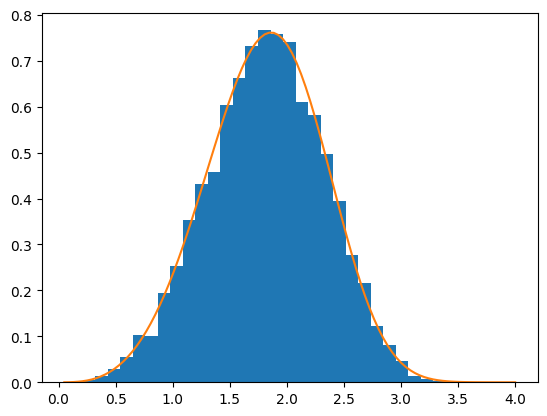

In [10]:
# ex5
alpha = 2
beta = 4
Weibull_samples = alpha*(-np.log(1-np.random.uniform(size=10000)))**(1/beta)
x_range = np.linspace(0.05, 4, 100)
y_range = beta*alpha**(-beta)*x_range**(beta-1)*np.exp(-(x_range/alpha)**beta)
plt.hist(Weibull_samples, bins=30, density=True)
plt.plot(x_range, y_range)

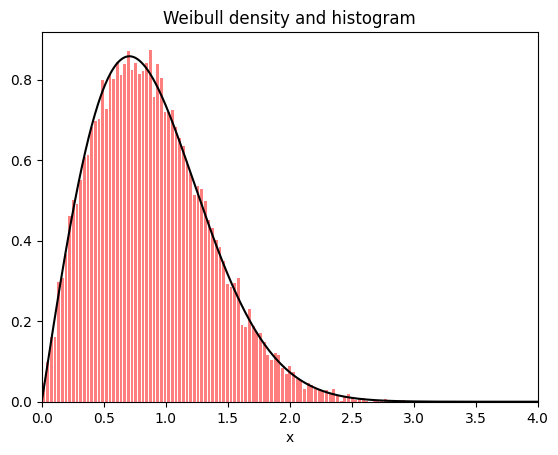

In [11]:
# ex5 sol
n = 20000

# sample from weibull
def weibull_density (w, a, b):
    return b * a**(-b) * w**(b-1) * np.exp(- (w / a)**b)

a = 1
b = 2

samples = np.array([]) # list to store samples

for i in range(n):
    u = np.random.uniform(0, 1)
    x = - np.log(1 - u)
    w = a * x**(1/b)
    samples = np.append(samples , w)

xx = np.linspace(0, 4, 1000)
yy = weibull_density (xx , a, b)
plt.plot(xx , yy , 'k-')
plt.hist(samples , bins=100 , density=True , rwidth=0.8, color='r', alpha=0.5)
plt.title("Weibull density and histogram")
plt.xlabel("x")
plt.xlim([0, 4])
plt.show ()